In [1]:
import pandas as pd
import numpy as np
import gspread
from gspread_dataframe import get_as_dataframe
from oauth2client.service_account import ServiceAccountCredentials
#from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
import pandas as pd
#from google.colab import drive

# Монтируем Google Drive
#drive.mount('/content/drive')

# Загружаем файлы XLSX
file_paths = [
    'Calls.xlsx',
    'Contacts.xlsx'
]

# Словарь для хранения датафреймов
dfs = {}

# Чтение каждого файла в датафрейм pandas и добавление в словарь
for file_path in file_paths:
    # Извлекаем название файла из пути
    file_name = file_path.split('/')[-1].split('.')[0]
    # Читаем файл и сохраняем в словарь
    dfs[file_name] = pd.read_excel(file_path, dtype={'CONTACTID': 'Int64'})

#Выводим на экран первые пять строк каждого датафрейма
print(f"Датафрейм Calls:\n{dfs['Calls'].head()}")


Датафрейм Calls:
                    Id   Call Start Time Call Owner Name            CONTACTID  \
0  5805028000000805001  30.06.2023 08:43        John Doe                 <NA>   
1  5805028000000768006  30.06.2023 08:46        John Doe                 <NA>   
2  5805028000000764027  30.06.2023 08:59        John Doe                 <NA>   
3  5805028000000787003  30.06.2023 09:20        John Doe  5805028000000645014   
4  5805028000000768019  30.06.2023 09:30        John Doe  5805028000000645014   

  Call Type  Call Duration (in seconds)       Call Status  Dialled Number  \
0   Inbound                       171.0          Received             NaN   
1  Outbound                        28.0  Attended Dialled             NaN   
2  Outbound                        24.0  Attended Dialled             NaN   
3  Outbound                         6.0  Attended Dialled             NaN   
4  Outbound                        11.0  Attended Dialled             NaN   

  Outgoing Call Status  Scheduled

In [76]:
# Замена значений <NA> на 0
dfs['Calls']['CONTACTID'] = dfs['Calls']['CONTACTID'].fillna(0)

# Преобразование столбца в int64
dfs['Calls']['CONTACTID'] = dfs['Calls']['CONTACTID'].astype('int64')

# Проверка типов данных после преобразования
print("Тип данных столбца CONTACTID после преобразования:", dfs['Calls']['CONTACTID'].dtype)

# Выведите несколько первых строк для проверки
print(dfs['Calls'].head())

Тип данных столбца CONTACTID после преобразования: int64
                    Id   Call Start Time Call Owner Name            CONTACTID  \
0  5805028000000805001  30.06.2023 08:43        John Doe                    0   
1  5805028000000768006  30.06.2023 08:46        John Doe                    0   
2  5805028000000764027  30.06.2023 08:59        John Doe                    0   
3  5805028000000787003  30.06.2023 09:20        John Doe  5805028000000645014   
4  5805028000000768019  30.06.2023 09:30        John Doe  5805028000000645014   

  Call Type  Call Duration (in seconds)       Call Status  Dialled Number  \
0   Inbound                       171.0          Received             NaN   
1  Outbound                        28.0  Attended Dialled             NaN   
2  Outbound                        24.0  Attended Dialled             NaN   
3  Outbound                         6.0  Attended Dialled             NaN   
4  Outbound                        11.0  Attended Dialled             N

In [4]:
dfs['Calls'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          95874 non-null  int64  
 1   Call Start Time             95874 non-null  object 
 2   Call Owner Name             95874 non-null  object 
 3   CONTACTID                   95874 non-null  int64  
 4   Call Type                   95874 non-null  object 
 5   Call Duration (in seconds)  95791 non-null  float64
 6   Call Status                 95874 non-null  object 
 7   Dialled Number              0 non-null      float64
 8   Outgoing Call Status        86875 non-null  object 
 9   Scheduled in CRM            86875 non-null  float64
 10  Tag                         0 non-null      float64
dtypes: float64(4), int64(2), object(5)
memory usage: 8.0+ MB


In [6]:
dfs['Calls'].tail()

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Dialled Number,Outgoing Call Status,Scheduled in CRM,Tag
95869,5805028000056889515,21.06.2024 15:30,Ulysses Adams,5805028000056564231,Outbound,6.0,Attended Dialled,NaN,Completed,0.0,NaN
95870,5805028000056875317,21.06.2024 15:30,Victor Barnes,5805028000054867023,Outbound,8.0,Attended Dialled,NaN,Completed,0.0,NaN
95871,5805028000056832495,21.06.2024 15:30,Kevin Parker,5805028000010617278,Outbound,5.0,Attended Dialled,NaN,Completed,0.0,NaN
95872,5805028000056893619,21.06.2024 15:30,Victor Barnes,5805028000056839048,Outbound,0.0,Unattended Dialled,NaN,Completed,0.0,NaN
95873,5805028000056893631,21.06.2024 15:31,John Doe,0,Missed,0.0,Missed,NaN,NaN,NaN,NaN


In [7]:
print(dfs['Calls'].head(10))

                    Id   Call Start Time Call Owner Name            CONTACTID  \
0  5805028000000805001  30.06.2023 08:43        John Doe                    0   
1  5805028000000768006  30.06.2023 08:46        John Doe                    0   
2  5805028000000764027  30.06.2023 08:59        John Doe                    0   
3  5805028000000787003  30.06.2023 09:20        John Doe  5805028000000645014   
4  5805028000000768019  30.06.2023 09:30        John Doe  5805028000000645014   
5  5805028000000790004  30.06.2023 12:09        John Doe  5805028000000645014   
6  5805028000000773022  30.06.2023 14:24        John Doe  5805028000000645014   
7  5805028000000879006  03.07.2023 13:06      Jane Smith                    0   
8  5805028000000870005  03.07.2023 13:08      Jane Smith                    0   
9  5805028000000971050  04.07.2023 12:36      Jane Smith                    0   

  Call Type  Call Duration (in seconds)         Call Status  Dialled Number  \
0   Inbound                  

In [8]:
dfs['Calls'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          95874 non-null  int64  
 1   Call Start Time             95874 non-null  object 
 2   Call Owner Name             95874 non-null  object 
 3   CONTACTID                   95874 non-null  int64  
 4   Call Type                   95874 non-null  object 
 5   Call Duration (in seconds)  95791 non-null  float64
 6   Call Status                 95874 non-null  object 
 7   Dialled Number              0 non-null      float64
 8   Outgoing Call Status        86875 non-null  object 
 9   Scheduled in CRM            86875 non-null  float64
 10  Tag                         0 non-null      float64
dtypes: float64(4), int64(2), object(5)
memory usage: 8.0+ MB


In [9]:
print(dfs['Calls'].isnull().sum())
print()
print(dfs['Calls'].nunique())
print()
print(dfs['Calls'][dfs['Calls'].duplicated()])

Id                                0
Call Start Time                   0
Call Owner Name                   0
CONTACTID                         0
Call Type                         0
Call Duration (in seconds)       83
Call Status                       0
Dialled Number                95874
Outgoing Call Status           8999
Scheduled in CRM               8999
Tag                           95874
dtype: int64

Id                            95874
Call Start Time               68445
Call Owner Name                  33
CONTACTID                     15215
Call Type                         3
Call Duration (in seconds)     2619
Call Status                      11
Dialled Number                    0
Outgoing Call Status              4
Scheduled in CRM                  2
Tag                               0
dtype: int64

Empty DataFrame
Columns: [Id, Call Start Time, Call Owner Name, CONTACTID, Call Type, Call Duration (in seconds), Call Status, Dialled Number, Outgoing Call Status, Scheduled in CR

In [7]:
# Получение списка уникальных значений в каждом столбце
unique_values = {col: dfs['Calls'][col].unique() for col in dfs['Calls'].columns}
for col, values in unique_values.items():
    print(f"\nУникальные значения в столбце '{col}':")
    print(values)


Уникальные значения в столбце 'Id':
[5805028000000805001 5805028000000768006 5805028000000764027 ...
 5805028000056832495 5805028000056893619 5805028000056893631]

Уникальные значения в столбце 'Call Start Time':
['30.06.2023 08:43' '30.06.2023 08:46' '30.06.2023 08:59' ...
 '21.06.2024 15:29' '21.06.2024 15:30' '21.06.2024 15:31']

Уникальные значения в столбце 'Call Owner Name':
['John Doe' 'Jane Smith' 'Alice Johnson' 'Bob Brown' 'Charlie Davis'
 'Diana Evans' 'Ethan Harris' 'Fiona Jackson' 'George King' 'Hannah Lee'
 'Ian Miller' 'Julia Nelson' 'Kevin Parker' 'Laura Quinn' 'Mason Roberts'
 'Nina Scott' 'Oliver Taylor' 'Paula Underwood' 'Quincy Vincent'
 'Rachel White' 'Sam Young' 'Tina Zhang' 'Ulysses Adams' 'Victor Barnes'
 'Wendy Clark' 'Xander Dean' 'Yara Edwards' 'Zachary Foster' 'Amy Green'
 'Ben Hall' 'Cara Iverson' 'Derek James' 'Eva Kent']

Уникальные значения в столбце 'CONTACTID':
[                  0 5805028000000645014 5805028000000872003 ...
 5805028000056727001 58050

In [77]:
# Преобразование столбцов в формат datetime в датафрейме 'Calls'
dfs['Calls']['Call Start Time'] = pd.to_datetime(dfs['Calls']['Call Start Time'], format='%d.%m.%Y %H:%M')


# Проверка изменений
print(dfs['Calls'].dtypes)
print(dfs['Calls'].head())
print(dfs['Calls'].info())

Id                                     int64
Call Start Time               datetime64[ns]
Call Owner Name                       object
CONTACTID                              int64
Call Type                             object
Call Duration (in seconds)           float64
Call Status                           object
Dialled Number                       float64
Outgoing Call Status                  object
Scheduled in CRM                     float64
Tag                                  float64
dtype: object
                    Id     Call Start Time Call Owner Name  \
0  5805028000000805001 2023-06-30 08:43:00        John Doe   
1  5805028000000768006 2023-06-30 08:46:00        John Doe   
2  5805028000000764027 2023-06-30 08:59:00        John Doe   
3  5805028000000787003 2023-06-30 09:20:00        John Doe   
4  5805028000000768019 2023-06-30 09:30:00        John Doe   

             CONTACTID Call Type  Call Duration (in seconds)  \
0                    0   Inbound                      

In [78]:
# Удаление дубликатов строк
dfs['Calls'].drop_duplicates(inplace=True)

In [12]:
print(dfs['Calls'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          95874 non-null  int64         
 1   Call Start Time             95874 non-null  datetime64[ns]
 2   Call Owner Name             95874 non-null  object        
 3   CONTACTID                   95874 non-null  int64         
 4   Call Type                   95874 non-null  object        
 5   Call Duration (in seconds)  95791 non-null  float64       
 6   Call Status                 95874 non-null  object        
 7   Dialled Number              0 non-null      float64       
 8   Outgoing Call Status        86875 non-null  object        
 9   Scheduled in CRM            86875 non-null  float64       
 10  Tag                         0 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)


In [79]:
# Удаление неактуальных столбцов  в датафрейме
columns_to_drop_calls = ['Tag', 'Dialled Number', 'Scheduled in CRM']
dfs['Calls'].drop(columns=columns_to_drop_calls, axis = 1 , inplace=True)
print(dfs['Calls'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          95874 non-null  int64         
 1   Call Start Time             95874 non-null  datetime64[ns]
 2   Call Owner Name             95874 non-null  object        
 3   CONTACTID                   95874 non-null  int64         
 4   Call Type                   95874 non-null  object        
 5   Call Duration (in seconds)  95791 non-null  float64       
 6   Call Status                 95874 non-null  object        
 7   Outgoing Call Status        86875 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 5.9+ MB
None


In [14]:
dfs['Calls'].isnull().sum()

Id                               0
Call Start Time                  0
Call Owner Name                  0
CONTACTID                        0
Call Type                        0
Call Duration (in seconds)      83
Call Status                      0
Outgoing Call Status          8999
dtype: int64

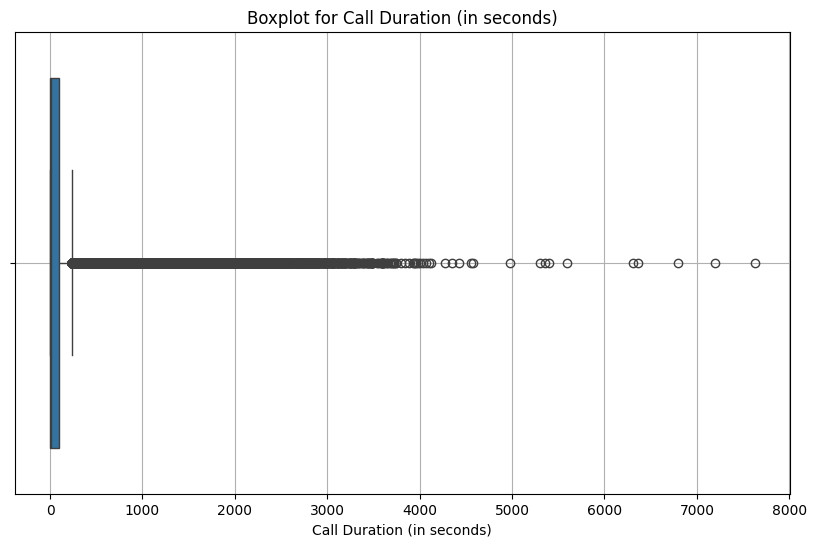

In [68]:
# Построение боксплота для столбца 'Call Duration (in seconds)', чтобы проверить выбросы и также значение медианы и среднее. 
#Это нам даст информацию о варианте заполнения пропущенных значений.
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfs['Calls'], x='Call Duration (in seconds)')
plt.title('Boxplot for Call Duration (in seconds)')
plt.xlabel('Call Duration (in seconds)')
plt.grid(True)
plt.show()

In [15]:
dfs['Calls'].describe()

,Id,Call Start Time,CONTACTID,Call Duration (in seconds)
count,9.587400e+04,95874,9.587400e+04,95791.000000
mean,5.805028e+18,2024-02-05 12:34:44.369484800,5.566891e+18,164.977263
min,5.805028e+18,2023-06-30 08:43:00,0.000000e+00,0.000000
25%,5.805028e+18,2023-11-24 11:07:30,5.805028e+18,4.000000
50%,5.805028e+18,2024-02-19 12:19:30,5.805028e+18,8.000000
75%,5.805028e+18,2024-04-22 19:10:00,5.805028e+18,98.000000
max,5.805028e+18,2024-06-21 15:31:00,5.805028e+18,7625.000000
std,1.584982e+07,NaN,1.151390e+18,401.410826


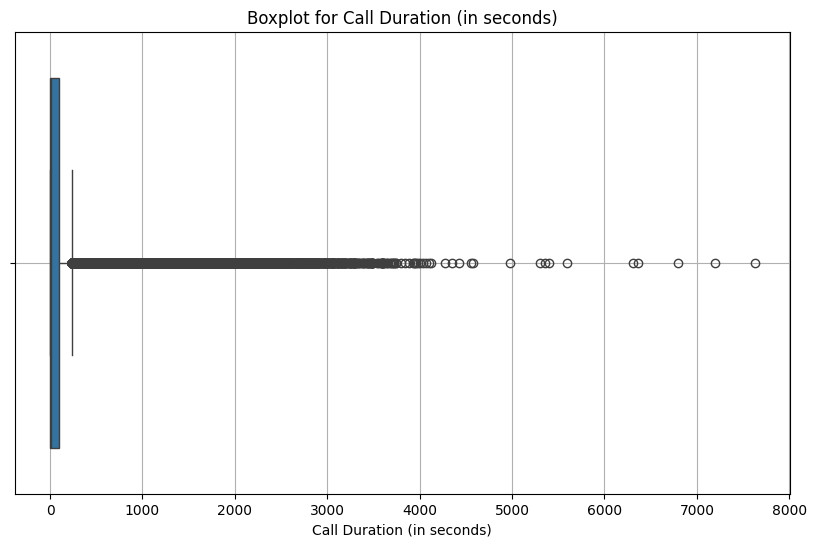

In [80]:
# Замена пропущенных значений в числовых столбцах на среднее значение
dfs['Calls']['Call Duration (in seconds)'] = dfs['Calls']['Call Duration (in seconds)'].fillna(dfs['Calls']['Call Duration (in seconds)'].mean())

# Построение боксплота для столбца 'Call Duration (in seconds)'
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfs['Calls'], x='Call Duration (in seconds)')
plt.title('Boxplot for Call Duration (in seconds)')
plt.xlabel('Call Duration (in seconds)')
plt.grid(True)
plt.show()

In [17]:
dfs['Calls'].describe()

,Id,Call Start Time,CONTACTID,Call Duration (in seconds)
count,9.587400e+04,95874,9.587400e+04,95874.000000
mean,5.805028e+18,2024-02-05 12:34:44.369484800,5.566891e+18,164.977263
min,5.805028e+18,2023-06-30 08:43:00,0.000000e+00,0.000000
25%,5.805028e+18,2023-11-24 11:07:30,5.805028e+18,4.000000
50%,5.805028e+18,2024-02-19 12:19:30,5.805028e+18,8.000000
75%,5.805028e+18,2024-04-22 19:10:00,5.805028e+18,98.000000
max,5.805028e+18,2024-06-21 15:31:00,5.805028e+18,7625.000000
std,1.584982e+07,NaN,1.151390e+18,401.237032


In [18]:
dfs['Calls'].isnull().sum()

Id                               0
Call Start Time                  0
Call Owner Name                  0
CONTACTID                        0
Call Type                        0
Call Duration (in seconds)       0
Call Status                      0
Outgoing Call Status          8999
dtype: int64

In [81]:
#ладно запускаем и получаем данные, какие есть. Таким образом машина нам предсказывает возможных клиентов

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


df = dfs['Calls']

# Преобразование столбцов в числовые значения с использованием LabelEncoder
le_owner = LabelEncoder()
le_time = LabelEncoder()

df['Owner_encoded'] = le_owner.fit_transform(df['Call Owner Name'].astype(str))
df['Time_encoded'] = le_time.fit_transform(df['Call Start Time'].astype(str))

# Работаем с подмножеством данных для экономии памяти
df_not_missing = df[df['CONTACTID'] != 0]  # Используем 0 как маркер пропущенных значений
df_not_missing = df_not_missing.sample(n=10000, random_state=42)  # Примерно 10,000 строк

# Подготовка данных
X = df_not_missing[['Owner_encoded', 'Time_encoded']]
y = df_not_missing['CONTACTID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели регрессии
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Заполнение пропусков в исходном DataFrame
df_missing = df[df['CONTACTID'] == 0]  # Используем 0 как маркер пропущенных значений
X_missing = df_missing[['Owner_encoded', 'Time_encoded']]
predicted_contact_ids = model.predict(X_missing)

# Заполнение пропусков и преобразование предсказанных значений в целые числа
df.loc[df['CONTACTID'] == 0, 'CONTACTID'] = predicted_contact_ids.astype('int64')

# Удаление временных столбцов
df.drop(columns=['Owner_encoded', 'Time_encoded'], inplace=True)

# Проверка результата
print(df.head())


                    Id     Call Start Time Call Owner Name  \
0  5805028000000805001 2023-06-30 08:43:00        John Doe   
1  5805028000000768006 2023-06-30 08:46:00        John Doe   
2  5805028000000764027 2023-06-30 08:59:00        John Doe   
3  5805028000000787003 2023-06-30 09:20:00        John Doe   
4  5805028000000768019 2023-06-30 09:30:00        John Doe   

             CONTACTID Call Type  Call Duration (in seconds)  \
0  5805028000024554496   Inbound                       171.0   
1  5805028000024554496  Outbound                        28.0   
2  5805028000024554496  Outbound                        24.0   
3  5805028000000645014  Outbound                         6.0   
4  5805028000000645014  Outbound                        11.0   

        Call Status Outgoing Call Status  
0          Received                  NaN  
1  Attended Dialled            Completed  
2  Attended Dialled            Completed  
3  Attended Dialled            Completed  
4  Attended Dialled        

In [20]:
print(f"Датафрейм Calls:\n{dfs['Calls'].head()}")

Датафрейм Calls:
                    Id     Call Start Time Call Owner Name  \
0  5805028000000805001 2023-06-30 08:43:00        John Doe   
1  5805028000000768006 2023-06-30 08:46:00        John Doe   
2  5805028000000764027 2023-06-30 08:59:00        John Doe   
3  5805028000000787003 2023-06-30 09:20:00        John Doe   
4  5805028000000768019 2023-06-30 09:30:00        John Doe   

             CONTACTID Call Type  Call Duration (in seconds)  \
0  5805028000024554496   Inbound                       171.0   
1  5805028000024554496  Outbound                        28.0   
2  5805028000024554496  Outbound                        24.0   
3  5805028000000645014  Outbound                         6.0   
4  5805028000000645014  Outbound                        11.0   

        Call Status Outgoing Call Status  
0          Received                  NaN  
1  Attended Dialled            Completed  
2  Attended Dialled            Completed  
3  Attended Dialled            Completed  
4  Attende

In [23]:
dfs['Calls'].head()

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status
0,5805028000000805001,2023-06-30 08:43:00,John Doe,5805028000024554496,Inbound,171.0,Received,NaN
1,5805028000000768006,2023-06-30 08:46:00,John Doe,5805028000024554496,Outbound,28.0,Attended Dialled,Completed
2,5805028000000764027,2023-06-30 08:59:00,John Doe,5805028000024554496,Outbound,24.0,Attended Dialled,Completed
3,5805028000000787003,2023-06-30 09:20:00,John Doe,5805028000000645014,Outbound,6.0,Attended Dialled,Completed
4,5805028000000768019,2023-06-30 09:30:00,John Doe,5805028000000645014,Outbound,11.0,Attended Dialled,Completed


In [21]:
dfs['Calls'].tail()

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status
95869,5805028000056889515,2024-06-21 15:30:00,Ulysses Adams,5805028000056564231,Outbound,6.0,Attended Dialled,Completed
95870,5805028000056875317,2024-06-21 15:30:00,Victor Barnes,5805028000054867023,Outbound,8.0,Attended Dialled,Completed
95871,5805028000056832495,2024-06-21 15:30:00,Kevin Parker,5805028000010617278,Outbound,5.0,Attended Dialled,Completed
95872,5805028000056893619,2024-06-21 15:30:00,Victor Barnes,5805028000056839048,Outbound,0.0,Unattended Dialled,Completed
95873,5805028000056893631,2024-06-21 15:31:00,John Doe,5805028000026616832,Missed,0.0,Missed,NaN


In [22]:
dfs['Calls'].describe()

,Id,Call Start Time,CONTACTID,Call Duration (in seconds)
count,9.587400e+04,95874,9.587400e+04,95874.000000
mean,5.805028e+18,2024-02-05 12:34:44.369484800,5.805028e+18,164.977263
min,5.805028e+18,2023-06-30 08:43:00,5.805028e+18,0.000000
25%,5.805028e+18,2023-11-24 11:07:30,5.805028e+18,4.000000
50%,5.805028e+18,2024-02-19 12:19:30,5.805028e+18,8.000000
75%,5.805028e+18,2024-04-22 19:10:00,5.805028e+18,98.000000
max,5.805028e+18,2024-06-21 15:31:00,5.805028e+18,7625.000000
std,1.584982e+07,NaN,1.537920e+07,401.237032


In [62]:
dfs['Calls'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95874 entries, 2023-06-30 08:43:00 to 2024-06-21 15:31:00
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          95874 non-null  int64  
 1   Call Owner Name             95874 non-null  object 
 2   CONTACTID                   95874 non-null  int64  
 3   Call Type                   95874 non-null  object 
 4   Call Duration (in seconds)  95874 non-null  float64
 5   Call Status                 95874 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 5.1+ MB


In [82]:
columns_to_drop_calls = ['Outgoing Call Status']
dfs['Calls'].drop(columns=columns_to_drop_calls, axis = 1 , inplace=True)
print(dfs['Calls'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          95874 non-null  int64         
 1   Call Start Time             95874 non-null  datetime64[ns]
 2   Call Owner Name             95874 non-null  object        
 3   CONTACTID                   95874 non-null  int64         
 4   Call Type                   95874 non-null  object        
 5   Call Duration (in seconds)  95874 non-null  float64       
 6   Call Status                 95874 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.1+ MB
None


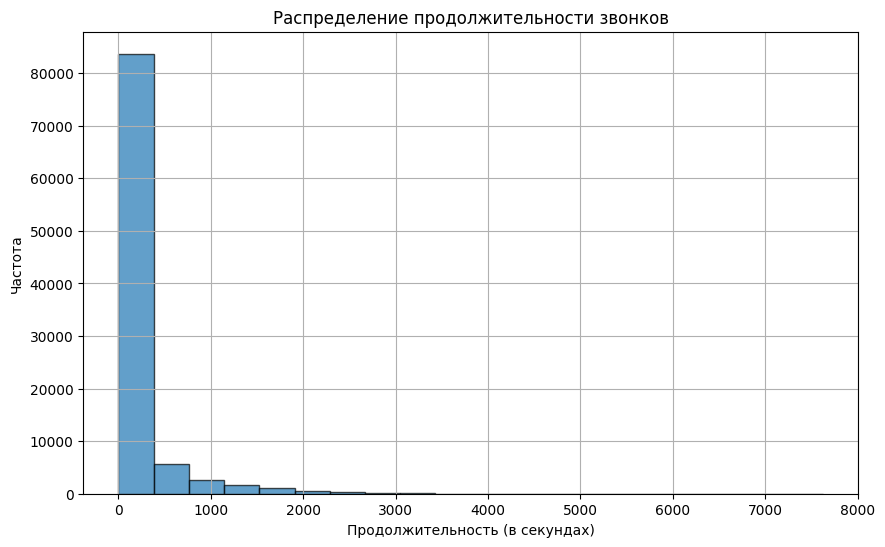

In [83]:
#Распределение продолжительности звонков, чтобы видеть распределение продолжительности звонков.

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(dfs['Calls']['Call Duration (in seconds)'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Распределение продолжительности звонков')
plt.xlabel('Продолжительность (в секундах)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

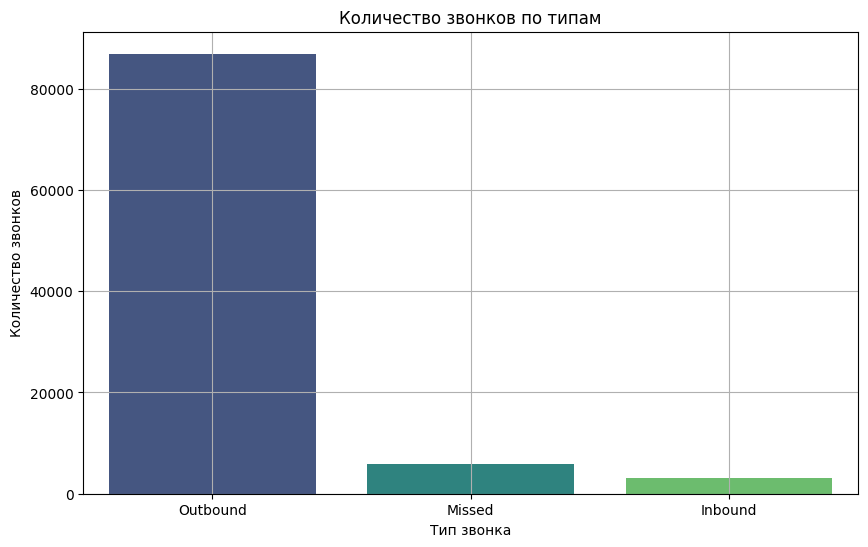

In [84]:
#Количество звонков по типам, столбчатую диаграмму для отображения количества звонков по типам.

import seaborn as sns

call_type_counts = dfs['Calls']['Call Type'].value_counts().reset_index()
call_type_counts.columns = ['Call Type', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Call Type', y='Count', data=call_type_counts, palette='viridis', hue='Call Type')
plt.title('Количество звонков по типам')
plt.xlabel('Тип звонка')
plt.ylabel('Количество звонков')
plt.grid(True)
plt.show()

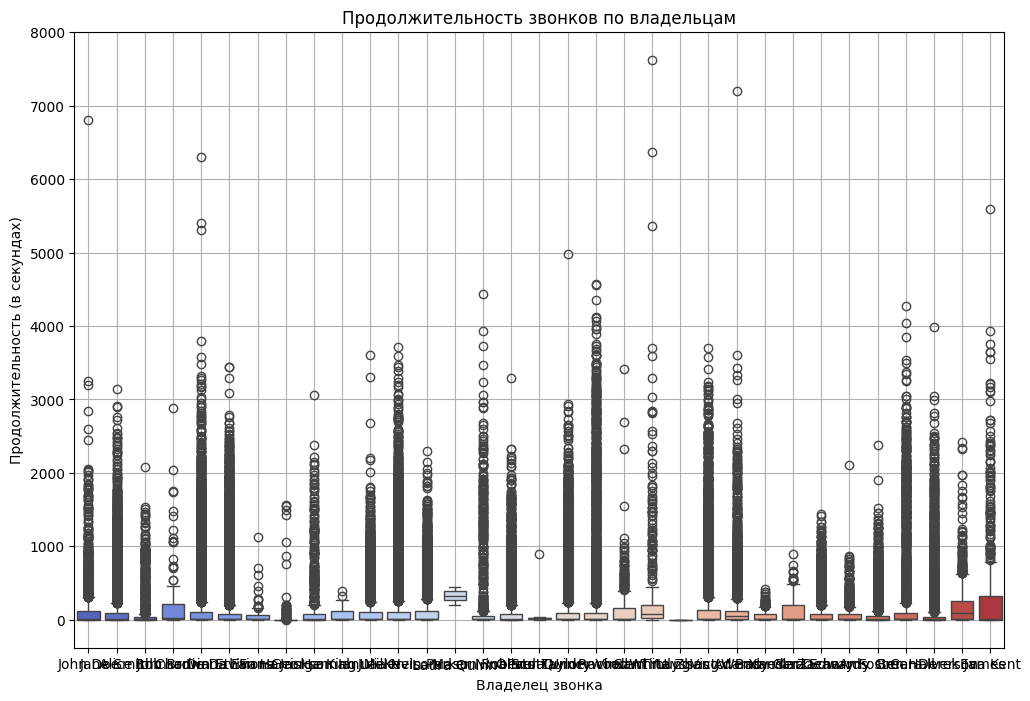

In [85]:
#Продолжительность звонков по владельцам -ящик с усами (boxplot), чтобы увидеть распределение продолжительности звонков по владельцам.


plt.figure(figsize=(12, 8))
sns.boxplot(x='Call Owner Name', y='Call Duration (in seconds)', data=df, palette='coolwarm', legend=False, hue ='Call Owner Name' )
plt.title('Продолжительность звонков по владельцам')
plt.xlabel('Владелец звонка')
plt.ylabel('Продолжительность (в секундах)')
plt.grid(True)
plt.show()

C:\Users\ICH\AppData\Local\Temp\ipykernel_19520\3857537777.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_counts = dfs['Calls'].groupby(dfs['Calls']['Call Start Time'].dt.floor('H')).size()


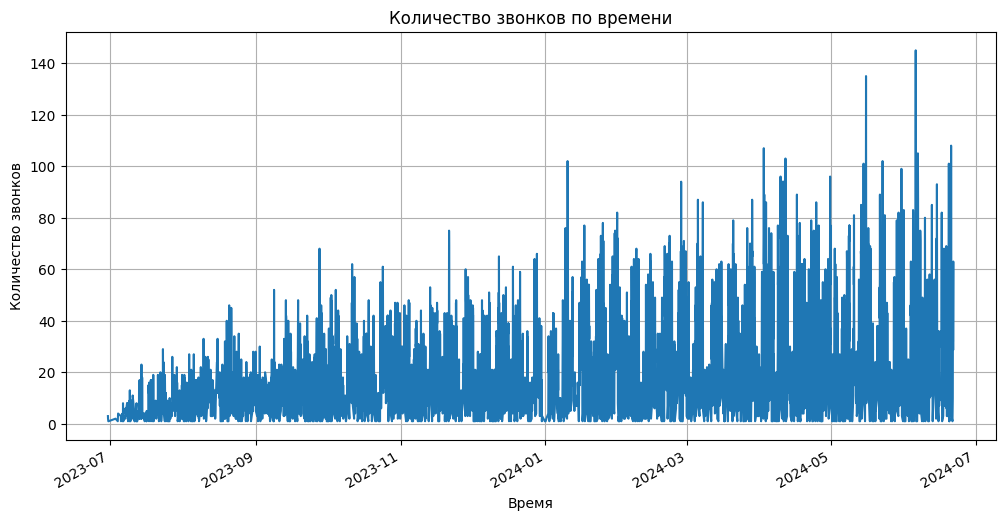

In [86]:
#Временной ряд звонков - график, отображающий количество звонков по времени.

# Конвертируем 'Call Start Time' в datetime, если это еще не сделано
#df['Call Start Time'] = pd.to_datetime(df['Call Start Time'])

# Ресемплинг данных по часам, группируя по 'Call Start Time' и считая количество
resampled_counts = dfs['Calls'].groupby(dfs['Calls']['Call Start Time'].dt.floor('H')).size()

# Построение графика
plt.figure(figsize=(12, 6))
resampled_counts.plot()
plt.title('Количество звонков по времени')
plt.xlabel('Время')
plt.ylabel('Количество звонков')
plt.grid(True)
plt.show()

In [90]:
dfs['Calls'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          95874 non-null  int64         
 1   Call Start Time             95874 non-null  datetime64[ns]
 2   Call Owner Name             95874 non-null  object        
 3   CONTACTID                   95874 non-null  int64         
 4   Call Type                   95874 non-null  object        
 5   Call Duration (in seconds)  95874 non-null  float64       
 6   Call Status                 95874 non-null  object        
 7   date                        95874 non-null  object        
 8   hour                        95874 non-null  int32         
 9   day_of_week                 95874 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(5)
memory usage: 6.9+ MB


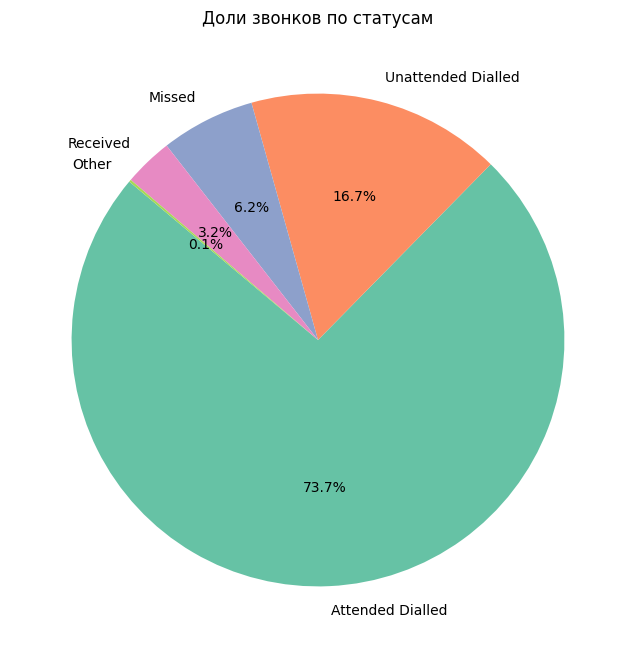

In [55]:
# распределение звонков по статусам в виде круговой диаграммы.
# Подсчитайте количество звонков по статусам
status_counts = dfs['Calls']['Call Status'].value_counts()

# Установите порог для отображения
threshold = 0.01  # Порог в долях (например, 1%)

# Рассчитайте проценты
percentages = status_counts / status_counts.sum()

# Отфильтруйте по порогу
filtered_status_counts = status_counts[percentages > threshold]
other_status_count = status_counts[percentages <= threshold].sum()

# Обновите метки и данные
labels = list(filtered_status_counts.index) + ['Other']
sizes = list(filtered_status_counts) + [other_status_count]

# Постройте круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('Set2').colors)
plt.title('Доли звонков по статусам')
plt.show()

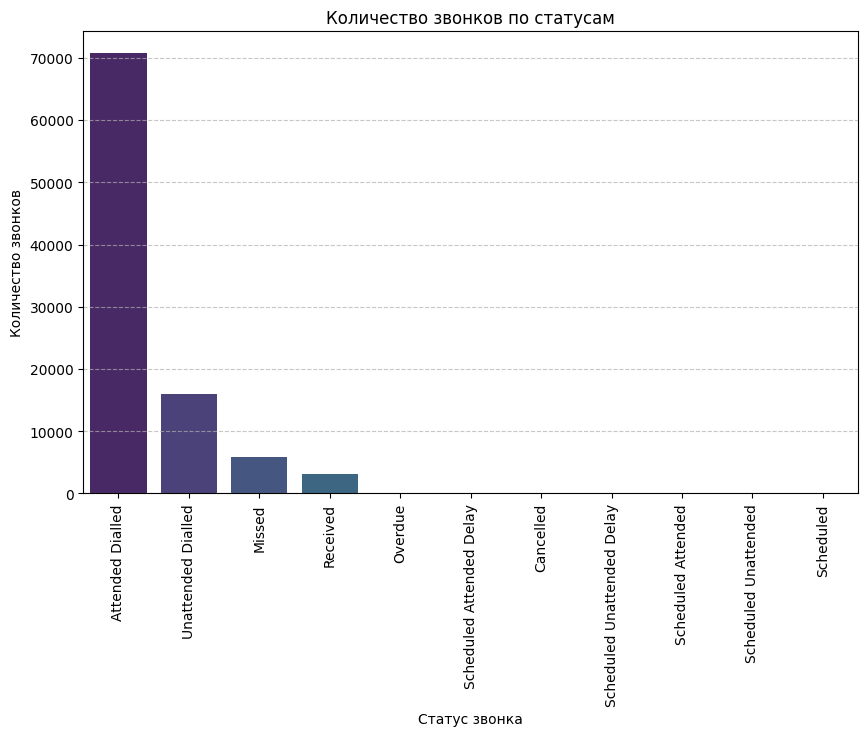

In [58]:
# Подсчитайте количество звонков по статусам
status_counts = df['Call Status'].value_counts().reset_index()
status_counts.columns = ['Call Status', 'Count']

# Постройте столбчатую диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(x='Call Status', y='Count', data=status_counts, palette='viridis', legend=False, hue='Call Status')

# Настройте заголовок и метки
plt.title('Количество звонков по статусам')
plt.xlabel('Статус звонка')
plt.ylabel('Количество звонков')

# Вращаем метки по оси X на 90 градусов
plt.xticks(rotation=90)

# Добавляем сетку для оси Y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Отобразите график
plt.show()

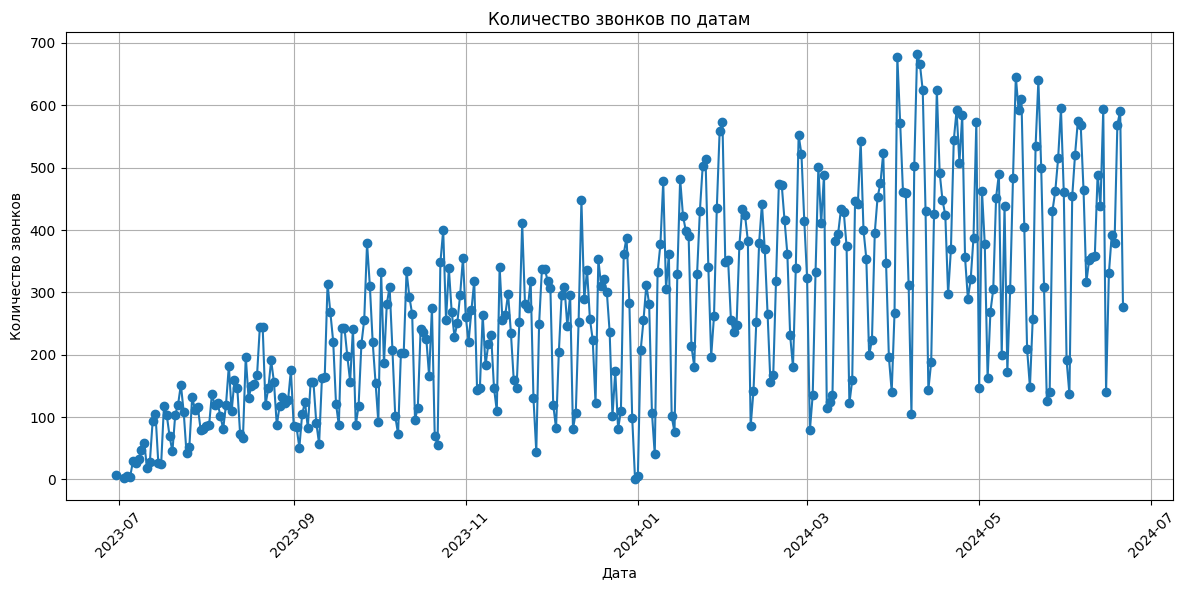

In [88]:
# Создание новых столбцов для анализа
dfs['Calls']['Call Start Time'] = pd.to_datetime(dfs['Calls']['Call Start Time'])
dfs['Calls']['date'] = dfs['Calls']['Call Start Time'].dt.date
dfs['Calls']['hour'] = dfs['Calls']['Call Start Time'].dt.hour
dfs['Calls']['day_of_week'] = dfs['Calls']['Call Start Time'].dt.day_name()

# Линейный график: количество звонков по датам
call_counts_by_date = dfs['Calls']['date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(call_counts_by_date.index, call_counts_by_date.values, marker='o')
plt.title('Количество звонков по датам')
plt.xlabel('Дата')
plt.ylabel('Количество звонков')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()



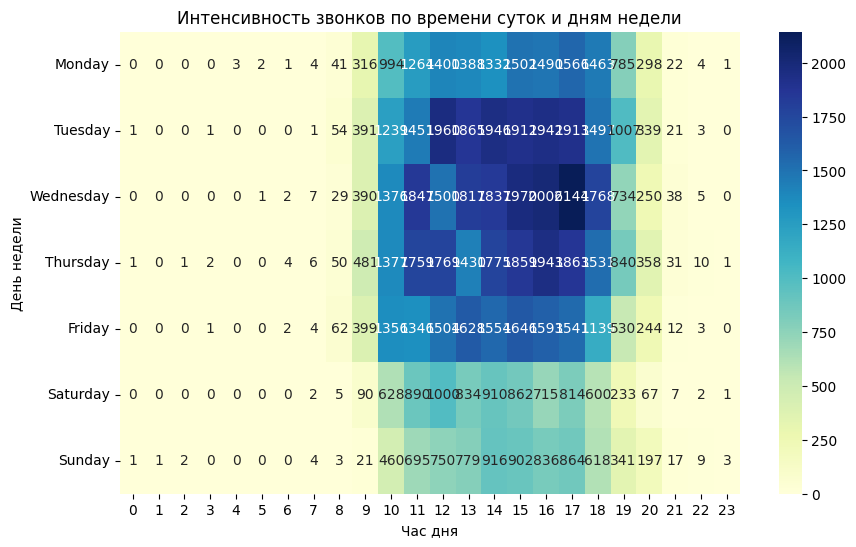

In [89]:
# Тепловая карта: интенсивность звонков по времени суток и дням недели
call_counts = dfs['Calls'].groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# Упорядочим дни недели
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
call_counts = call_counts.reindex(days_order)

plt.figure(figsize=(10, 6))
sns.heatmap(call_counts, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Интенсивность звонков по времени суток и дням недели')
plt.xlabel('Час дня')
plt.ylabel('День недели')
plt.show()

In [91]:
calls_df = pd.DataFrame(dfs['Calls'].copy())

In [92]:
calls_df

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,date,hour,day_of_week
0,5805028000000805001,2023-06-30 08:43:00,John Doe,5805028000024554496,Inbound,171.0,Received,2023-06-30,8,Friday
1,5805028000000768006,2023-06-30 08:46:00,John Doe,5805028000024554496,Outbound,28.0,Attended Dialled,2023-06-30,8,Friday
2,5805028000000764027,2023-06-30 08:59:00,John Doe,5805028000024554496,Outbound,24.0,Attended Dialled,2023-06-30,8,Friday
3,5805028000000787003,2023-06-30 09:20:00,John Doe,5805028000000645014,Outbound,6.0,Attended Dialled,2023-06-30,9,Friday
4,5805028000000768019,2023-06-30 09:30:00,John Doe,5805028000000645014,Outbound,11.0,Attended Dialled,2023-06-30,9,Friday
...,...,...,...,...,...,...,...,...,...,...
95869,5805028000056889515,2024-06-21 15:30:00,Ulysses Adams,5805028000056564231,Outbound,6.0,Attended Dialled,2024-06-21,15,Friday
95870,5805028000056875317,2024-06-21 15:30:00,Victor Barnes,5805028000054867023,Outbound,8.0,Attended Dialled,2024-06-21,15,Friday
95871,5805028000056832495,2024-06-21 15:30:00,Kevin Parker,5805028000010617278,Outbound,5.0,Attended Dialled,2024-06-21,15,Friday
95872,5805028000056893619,2024-06-21 15:30:00,Victor Barnes,5805028000056839048,Outbound,0.0,Unattended Dialled,2024-06-21,15,Friday


In [93]:
dfs['Calls'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          95874 non-null  int64         
 1   Call Start Time             95874 non-null  datetime64[ns]
 2   Call Owner Name             95874 non-null  object        
 3   CONTACTID                   95874 non-null  int64         
 4   Call Type                   95874 non-null  object        
 5   Call Duration (in seconds)  95874 non-null  float64       
 6   Call Status                 95874 non-null  object        
 7   date                        95874 non-null  object        
 8   hour                        95874 non-null  int32         
 9   day_of_week                 95874 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(5)
memory usage: 6.9+ MB


In [94]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          95874 non-null  int64         
 1   Call Start Time             95874 non-null  datetime64[ns]
 2   Call Owner Name             95874 non-null  object        
 3   CONTACTID                   95874 non-null  int64         
 4   Call Type                   95874 non-null  object        
 5   Call Duration (in seconds)  95874 non-null  float64       
 6   Call Status                 95874 non-null  object        
 7   date                        95874 non-null  object        
 8   hour                        95874 non-null  int32         
 9   day_of_week                 95874 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(5)
memory usage: 6.9+ MB


In [95]:
columns_to_drop_calls = ['date', 'hour', 'day_of_week']
calls_df.drop(columns=columns_to_drop_calls, axis = 1 , inplace=True)
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          95874 non-null  int64         
 1   Call Start Time             95874 non-null  datetime64[ns]
 2   Call Owner Name             95874 non-null  object        
 3   CONTACTID                   95874 non-null  int64         
 4   Call Type                   95874 non-null  object        
 5   Call Duration (in seconds)  95874 non-null  float64       
 6   Call Status                 95874 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.1+ MB
